<a href="https://colab.research.google.com/github/shucream/colab/blob/master/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt

from PIL import Image

Using TensorFlow backend.


# 設定

In [0]:
batch_size = 128
size = (28, 28)

# データセット

## ダウンロード

In [3]:
(x_train_valid, y_train_valid), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


## ValidationデータをTrainから抽出

In [0]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train_valid, y_train_valid, test_size=0.175)

## ラベルをベクトルに展開

In [0]:
y_train = keras.utils.to_categorical(y_train, 10)
y_valid = keras.utils.to_categorical(y_valid, 10)
y_test = keras.utils.to_categorical(y_test, 10)

## Shape合わせ
(データ数 縦 横 色種類) データを0~1で正規化

In [0]:
x_train = np.expand_dims(x_train, 3) / 255
x_valid = np.expand_dims(x_valid, 3) / 255
x_test = np.expand_dims(x_test, 3) / 255

# モデル


In [0]:
def create_cnn():
  model = Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(10, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
  
  return model

In [0]:
model = create_cnn()

# 学習

In [29]:
history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_valid, y_valid))

Train on 49500 samples, validate on 10500 samples
Epoch 1/10
49500/49500 [==============================] - 3s 57us/step - loss: 0.0807 - accuracy: 0.9760 - val_loss: 0.0621 - val_accuracy: 0.9812
Epoch 2/10
49500/49500 [==============================] - 3s 56us/step - loss: 0.0608 - accuracy: 0.9817 - val_loss: 0.0519 - val_accuracy: 0.9860
Epoch 3/10
49500/49500 [==============================] - 3s 56us/step - loss: 0.0539 - accuracy: 0.9844 - val_loss: 0.0435 - val_accuracy: 0.9872
Epoch 4/10
49500/49500 [==============================] - 3s 56us/step - loss: 0.0452 - accuracy: 0.9861 - val_loss: 0.0470 - val_accuracy: 0.9880
Epoch 5/10
49500/49500 [==============================] - 3s 56us/step - loss: 0.0428 - accuracy: 0.9873 - val_loss: 0.0436 - val_accuracy: 0.9868
Epoch 6/10
49500/49500 [==============================] - 3s 56us/step - loss: 0.0407 - accuracy: 0.9882 - val_loss: 0.0508 - val_accuracy: 0.9864
Epoch 7/10
49500/49500 [==============================] - 3s 56us/st

# テスト

Test loss: 0.03404800021825649
Test accuracy: 0.9900000095367432


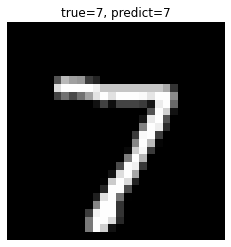

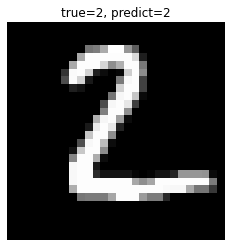

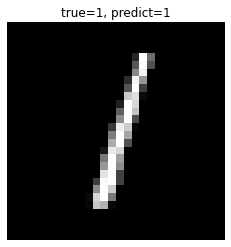

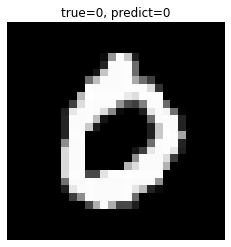

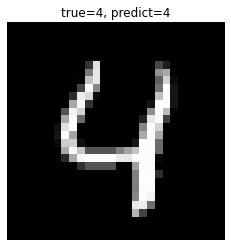

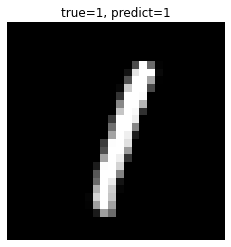

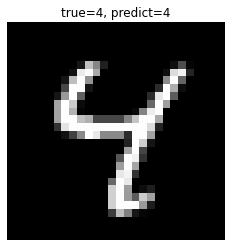

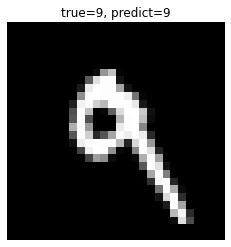

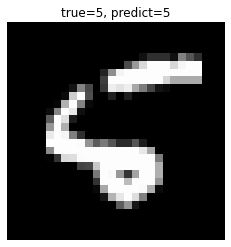

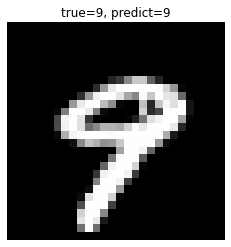

In [30]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
z_test = model.predict(x_test)
for i in range(10):
  plt.imshow(x_test[i].squeeze(), cmap = "gray")
  plt.axis('off')
  plt.title('true={}, predict={}'.format(y_test[i].argmax(), z_test[i].argmax()))
  plt.show()

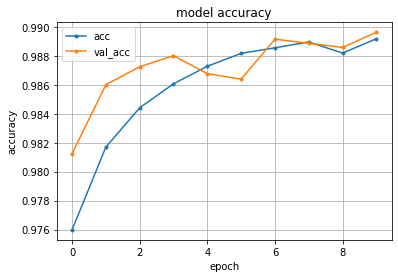

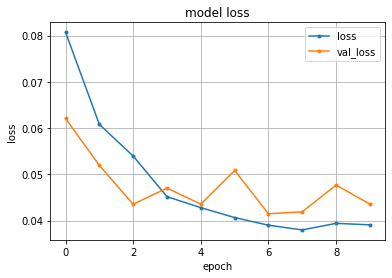

In [31]:
# 精度のplot
plt.plot(history.history['accuracy'], marker='.', label='acc')
plt.plot(history.history['val_accuracy'], marker='.', label='val_acc')
plt.title('model accuracy')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(loc='best')
plt.show()

# 損失のplot
plt.plot(history.history['loss'], marker='.', label='loss')
plt.plot(history.history['val_loss'], marker='.', label='val_loss')
plt.title('model loss')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc='best')
plt.show()

# 自分の画像を予測

In [22]:
# 画像を読み込んで整形
!wget http://www.ess.ic.kanagawa-it.ac.jp/std_img/monoimage/LENNA.jpg
original_image = Image.open(f'LENNA.jpg').resize(size)
original_data = np.array(original_image) / 255
original_data = np.expand_dims(original_data, 0)
x_original = np.expand_dims(original_data, 3)

--2020-06-03 16:36:19--  http://www.ess.ic.kanagawa-it.ac.jp/std_img/monoimage/LENNA.jpg
Resolving www.ess.ic.kanagawa-it.ac.jp (www.ess.ic.kanagawa-it.ac.jp)... 202.250.66.20
Connecting to www.ess.ic.kanagawa-it.ac.jp (www.ess.ic.kanagawa-it.ac.jp)|202.250.66.20|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5910 (5.8K) [image/jpeg]
Saving to: ‘LENNA.jpg.2’

LENNA.jpg.2         100%[===================>]   5.77K  --.-KB/s    in 0s      

2020-06-03 16:36:19 (544 MB/s) - ‘LENNA.jpg.2’ saved [5910/5910]



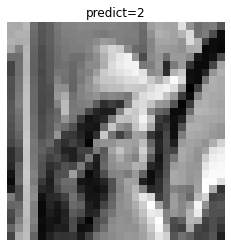

In [32]:
z_original = model.predict(x_original)

plt.imshow(x_original[0].squeeze(), cmap = "gray")
plt.title('predict={}'.format(z_original[0].argmax()))
plt.axis('off')
plt.show()